In [419]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters


In [420]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.array([1.1, 0.2])

The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2$

In [421]:
f = lambda x: 0.5*np.sum((A @ x - b) ** 2)

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x - b)


Plot the function

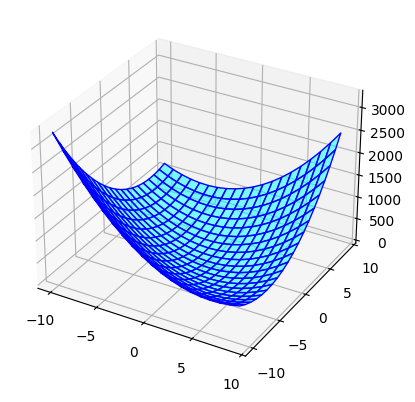

In [422]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
F = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1, 1] - b[1]) ** 2
xx, yy = np.meshgrid(np.arange(-10, 10), np.arange(-10, 10))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

Parameters of gradient descent

In [423]:
TOL_GRAD_NORM = 1e-5
MAX_ITER = 100
TOL_DIST = 1e-4
alpha_grid = [0.01, 0.05, 0.1] #  step size.. play with this, the system might get really unstable

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [424]:
x_inits = np.random.randint(-50, 50, size=(5, 2)) # np.array([-5, 10])
print(x_inits)

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
# all_x will be a list of lists of lists: all_x[i][j] holds the history for x_inits[i] and alpha_grid[j]
all_x = [[[x_inits[i].copy()]] for i in range(x_inits.shape[0])]
for i in range(x_inits.shape[0]):
    all_x[i] = [[x_inits[i].copy()] for _ in range(len(alpha_grid))]
print(all_x)


[[-37 -31]
 [-43  31]
 [-34 -16]
 [ 20  15]
 [-39  44]]
[[[array([-37, -31])], [array([-37, -31])], [array([-37, -31])]], [[array([-43,  31])], [array([-43,  31])], [array([-43,  31])]], [[array([-34, -16])], [array([-34, -16])], [array([-34, -16])]], [[array([20, 15])], [array([20, 15])], [array([20, 15])]], [[array([-39,  44])], [array([-39,  44])], [array([-39,  44])]]]


Main loop

In [ ]:
cnt = 0

for i in range(x_inits.shape[0]):
    for j in range(len(alpha_grid)):
        grad_norm = 1e10
        distanceX = 1e10
        cnt = 0
        # reset to original x_init
        # could track values better, but this works as well
        x_inits[i] = all_x[i][j][0]
        while grad_norm > TOL_GRAD_NORM and cnt < MAX_ITER and distanceX > TOL_DIST:
            cnt = cnt + 1
            # gradient descent step
            x_new = x_inits[i] - alpha_grid[j] * df(x_inits[i])
            # print(f"{x_new} = {x_inits[i]} - {alpha_grid[j]} * {df(x_inits[i])}")
            
            # compute the norm of the gradient for the stopping criteria
            grad_norm = np.linalg.norm(df(x_new))

            # compute the distance between two consecutive iterates for the stopping criteria
            distanceX = np.linalg.norm(x_inits[i] - x_new)

            # store the estimate
            x_inits[i] = x_new
            all_x[i][j].append(x_new)

[-31.423 -25.645] = [-37 -31] - 0.01 * [-557.7 -535.5]
[-26.383 -20.605] = [-31 -25] - 0.01 * [-461.7 -439.5]
[-22.183 -16.405] = [-26 -20] - 0.01 * [-381.7 -359.5]
[-18.823 -13.045] = [-22 -16] - 0.01 * [-317.7 -295.5]
[-15.403 -10.585] = [-18 -13] - 0.01 * [-259.7 -241.5]
[-12.883  -8.065] = [-15 -10] - 0.01 * [-211.7 -193.5]
[-10.303  -6.445] = [-12  -8] - 0.01 * [-169.7 -155.5]
[-8.623 -4.765] = [-10  -6] - 0.01 * [-137.7 -123.5]
[-6.943 -3.085] = [-8 -4] - 0.01 * [-105.7  -91.5]
[-5.203 -2.305] = [-6 -3] - 0.01 * [-79.7 -69.5]
[-4.363 -1.465] = [-5 -2] - 0.01 * [-63.7 -53.5]
[-3.523 -0.625] = [-4 -1] - 0.01 * [-47.7 -37.5]
[-2.683  0.215] = [-3  0] - 0.01 * [-31.7 -21.5]
[-1.783  0.155] = [-2  0] - 0.01 * [-21.7 -15.5]
[-0.883  0.095] = [-1  0] - 0.01 * [-11.7  -9.5]
[0.017 0.035] = [0 0] - 0.01 * [-1.7 -3.5]
[0.017 0.035] = [0 0] - 0.01 * [-1.7 -3.5]
[0.017 0.035] = [0 0] - 0.01 * [-1.7 -3.5]
[0.017 0.035] = [0 0] - 0.01 * [-1.7 -3.5]
[0.017 0.035] = [0 0] - 0.01 * [-1.7 -3.5]
[0

Plot all the estimates

[array([-37, -31]), array([-31.423, -25.645]), array([-26.383, -20.605]), array([-22.183, -16.405]), array([-18.823, -13.045]), array([-15.403, -10.585]), array([-12.883,  -8.065]), array([-10.303,  -6.445]), array([-8.623, -4.765]), array([-6.943, -3.085]), array([-5.203, -2.305]), array([-4.363, -1.465]), array([-3.523, -0.625]), array([-2.683,  0.215]), array([-1.783,  0.155]), array([-0.883,  0.095]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.

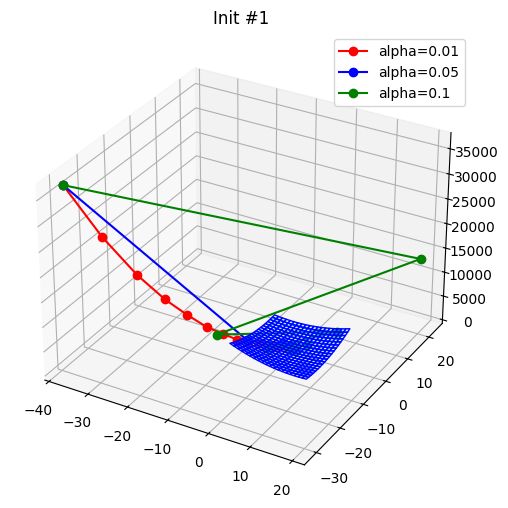

[array([-43,  31]), array([-40.543,  30.515]), array([-37.783,  29.435]), array([-35.023,  28.355]), array([-33.163,  27.335]), array([-31.303,  26.315]), array([-29.443,  25.295]), array([-27.583,  24.275]), array([-25.723,  23.255]), array([-23.863,  22.235]), array([-22.003,  21.215]), array([-21.043,  20.255]), array([-20.083,  19.295]), array([-19.123,  18.335]), array([-18.163,  17.375]), array([-17.203,  16.415]), array([-16.243,  15.455]), array([-15.283,  14.495]), array([-14.323,  13.535]), array([-13.363,  12.575]), array([-12.403,  11.615]), array([-11.443,  10.655]), array([-10.483,   9.695]), array([-9.523,  8.735]), array([-8.563,  7.775]), array([-7.603,  6.815]), array([-6.643,  5.855]), array([-5.683,  4.895]), array([-4.723,  3.935]), array([-3.763,  2.975]), array([-2.803,  2.015]), array([-1.903,  1.955]), array([-0.943,  0.995]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035])

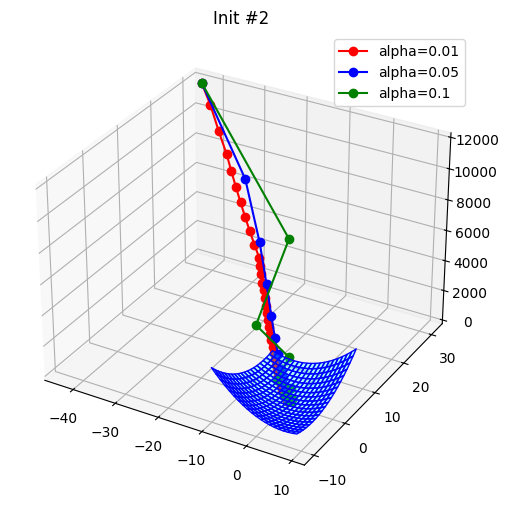

[array([-34, -16]), array([-29.623, -12.325]), array([-25.363,  -9.025]), array([-21.943,  -6.565]), array([-18.523,  -4.105]), array([-15.943,  -2.485]), array([-13.363,  -0.865]), array([-11.683,   0.815]), array([-9.883,  0.695]), array([-8.083,  0.575]), array([-7.183,  0.515]), array([-6.283,  0.455]), array([-5.383,  0.395]), array([-4.483,  0.335]), array([-3.583,  0.275]), array([-2.683,  0.215]), array([-1.783,  0.155]), array([-0.883,  0.095]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017

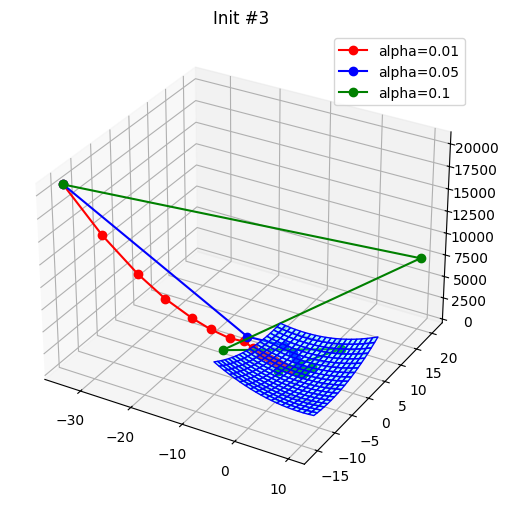

[array([20, 15]), array([17.117, 12.335]), array([14.597,  9.815]), array([12.077,  7.295]), array([10.397,  5.615]), array([8.717, 3.935]), array([7.037, 2.255]), array([6.197, 1.415]), array([5.357, 0.575]), array([ 4.517, -0.265]), array([ 3.617, -0.205]), array([ 2.717, -0.145]), array([ 1.817, -0.085]), array([ 0.917, -0.025]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035])

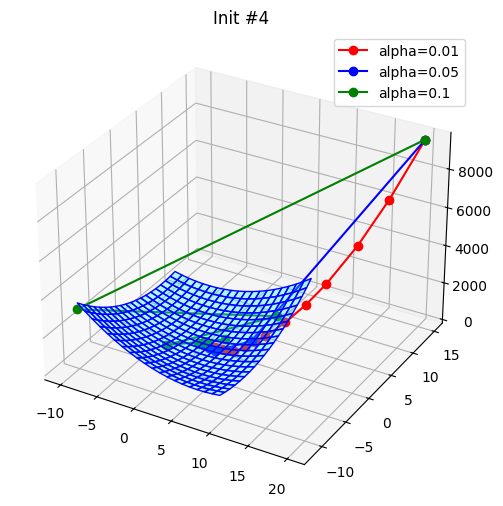

[array([-39,  44]), array([-37.723,  41.975]), array([-35.743,  39.155]), array([-33.823,  37.235]), array([-31.903,  35.315]), array([-29.983,  33.395]), array([-28.063,  31.475]), array([-27.043,  29.615]), array([-26.023,  27.755]), array([-25.003,  25.895]), array([-23.983,  24.035]), array([-22.123,  23.015]), array([-21.163,  22.055]), array([-20.203,  21.095]), array([-19.243,  20.135]), array([-18.283,  19.175]), array([-17.323,  18.215]), array([-16.363,  17.255]), array([-15.403,  16.295]), array([-14.443,  15.335]), array([-13.483,  14.375]), array([-12.523,  13.415]), array([-11.563,  12.455]), array([-10.603,  11.495]), array([-9.643, 10.535]), array([-8.683,  9.575]), array([-7.723,  8.615]), array([-6.763,  7.655]), array([-5.803,  6.695]), array([-4.843,  5.735]), array([-3.883,  4.775]), array([-2.923,  3.815]), array([-1.963,  2.855]), array([-1.003,  1.895]), array([-0.943,  0.995]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0

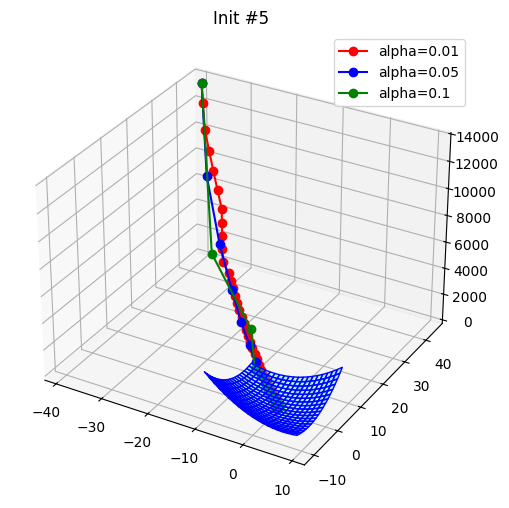

In [426]:
colors = ['red', 'blue', 'green']
for i, x_init in enumerate(x_inits):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')
    ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.3, facecolor=[0, 1, 1])
    for j, a in enumerate(alpha_grid):
        realization = all_x[i][j]
        print(realization)
        xxplot = [x[0] for x in realization]
        yyplot = [x[1] for x in realization]
        zzplot = F(np.array(xxplot), np.array(yyplot))
        ax.plot3D(xxplot, yyplot, zzplot, marker='o', color=colors[j % len(colors)], label=f'alpha={a}')
    ax.set_title(f'Init #{i+1}')
    ax.legend()
    plt.show()
